In [29]:
!pip install spacy
!python -m spacy download ru_core_news_lg

2021-05-05 16:01:06.408212: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-05-05 16:01:06.408239: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 515.3 MB 7.1 kB/s eta 0:00:01    |‚ñà‚ñè                              | 18.9 MB 4.8 MB/s eta 0:01:45     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                     | 164.9 MB 2.1 MB/s eta 0:02:44     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                   | 203.6 MB 1.6 MB/s eta 0:03:15


‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import spacy
from pymystem3 import Mystem
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import time

#import emoji

In [29]:
columns = ['comment', 'date_time', 'color','size', 'thumb_up', 'thumb_down', 'prod_eval', 'prod', 'brand']

df = pd.read_json('./input/file_7961415_946967395_295.jl').transpose().reset_index().drop('index', axis=1)
df = df.set_axis(columns, axis = 'columns')

df.head(5)

comment  \
0  –°–∞—Ä–∞—Ñ–∞–Ω —à–∏–∫–∞—Ä–µ–Ω, —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ. –¢–∞–∫–æ–π –ª—ë–≥–∫–∏–π, —Å...   
1  –û—Ç–ª–∏—á–Ω—ã–π —Å–∞—Ä–∞—Ñ–∞–Ω, —Å—Ç–∞–ª –æ–¥–Ω–∏–º –∏–∑ –ª—é–±–∏–º—ã—Ö. –û—á–µ–Ω—å...   
2  –°–∞—Ä–∞—Ñ–∞–Ω —Ö–æ—Ä–æ—à–æ —Å—à–∏—Ç, –Ω–æ –¥–ª—è –º–µ–Ω—è –º–Ω–æ–≥–æ —Å–∏–Ω—Ç–µ—Ç–∏...   
3  –°–∞—Ä–∞—Ñ–∞–Ω –º–Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è. –Ø –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω...   
4  –ù–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –∫–∞–∫ —Å–µ–ª–æ , –Ω–∞ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –±–æ–ª—å...   

                        date_time                     color size thumb_up  \
0  2020-07-24T16:52:19.166628728Z             —á–µ—Ä–Ω—ã–π, –±–µ–ª—ã–π   44        1   
1  2019-11-22T11:37:12.282151796Z              —Å–∏–Ω–∏–π, –±–µ–ª—ã–π   48        1   
2  2019-11-11T10:04:38.841881311Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        1   
3  2019-09-24T16:53:27.302528222Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        2   
4  2019-09-05T10:58:25.577249481Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   46        2   

  thumb_down prod_eval     prod      brand  
0          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro  
1          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro  
2          0         4  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro  
3          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro  
4          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro

# Stopwords extension

In [30]:
# –Ω—É–∂–Ω–æ –æ–±–Ω–æ–≤–∏—Ç—å —Å—Ç–æ–ø-—Å–ª–æ–≤–∞, –¥–æ–±–∞–≤–∏–≤ –∫–∞–∫ –º–∏–Ω–∏–º—É —Ç–æ, —á—Ç–æ –≤ –æ–±–ª–∞–∫–µ. –°–µ–π—á–∞—Å –∏—Å–ø–æ–ª—å–∑—É—é —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ NLTK, 
# –Ω–æ —Å—Ç–æ–∏—Ç —Å—Ä–∞–≤–Ω–∏—Ç—å —Å –¥—Ä—É–≥–∏–º–∏
russian_stopwords = stopwords.words("russian")

russian_stopwords.extend(['–æ—á–µ–Ω—å', '—Ö–æ—Ä–æ—à–∏–π', '–æ—Ç–ª–∏—á–Ω—ã–π', '—Å–≤–æ–π', '–æ—Ç–∑—ã–≤', '–º–∏–∫—Å–µ—Ä', '—Å—É–ø–µ—Ä','—ç—Ç–æ', '—Å–ø–∞—Å–∏–±–æ', '—Ä–∞–±–æ—Ç–∞',
                          re.sub(r'[.,?!@#~`$%^&*_+-=]', '', df['brand'][0].lower()), 
                          re.sub(r'[.,?!@#~`$%^&*_+-=]', '', df['prod'][0].lower())])
#print(len(russian_stopwords))
#print(len(russian_stopwords))

In [42]:
df.head(5)

comment  \
0  –°–∞—Ä–∞—Ñ–∞–Ω —à–∏–∫–∞—Ä–µ–Ω, —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ. –¢–∞–∫–æ–π –ª—ë–≥–∫–∏–π, —Å...   
1  –û—Ç–ª–∏—á–Ω—ã–π —Å–∞—Ä–∞—Ñ–∞–Ω, —Å—Ç–∞–ª –æ–¥–Ω–∏–º –∏–∑ –ª—é–±–∏–º—ã—Ö. –û—á–µ–Ω—å...   
2  –°–∞—Ä–∞—Ñ–∞–Ω —Ö–æ—Ä–æ—à–æ —Å—à–∏—Ç, –Ω–æ –¥–ª—è –º–µ–Ω—è –º–Ω–æ–≥–æ —Å–∏–Ω—Ç–µ—Ç–∏...   
3  –°–∞—Ä–∞—Ñ–∞–Ω –º–Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è. –Ø –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω...   
4  –ù–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –∫–∞–∫ —Å–µ–ª–æ , –Ω–∞ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –±–æ–ª—å...   

                        date_time                     color size thumb_up  \
0  2020-07-24T16:52:19.166628728Z             —á–µ—Ä–Ω—ã–π, –±–µ–ª—ã–π   44        1   
1  2019-11-22T11:37:12.282151796Z              —Å–∏–Ω–∏–π, –±–µ–ª—ã–π   48        1   
2  2019-11-11T10:04:38.841881311Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        1   
3  2019-09-24T16:53:27.302528222Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        2   
4  2019-09-05T10:58:25.577249481Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   46        2   

  thumb_down prod_eval     prod      brand  \
0          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
1          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
2          0         4  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
3          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
4          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   

                                     cleaned_comment  \
0  —à–∏–∫–∞—Ä–µ–Ω —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ –ª—ë–≥–∫–∏–π —Å—Ç—Ä—É—è—â–∏–π—Å—è —Å—Ç—Ä–æ–π–Ω–∏...   
1  —Å–∞—Ä–∞—Ñ–∞–Ω —Å—Ç–∞–ª –æ–¥–Ω–∏–º –ª—é–±–∏–º—ã—Ö —É–¥–æ–±–Ω—ã–π —Å—Ç—Ä–æ–π–Ω–∏—Ç –ø—Ä...   
2  —Å—à–∏—Ç —Å–∏–Ω—Ç–µ—Ç–∏–∫–∏ —Ç—è–Ω–µ—Ç—Å—è —Å–ø–∏–Ω–∫–∞ –∑–∞–Ω–∏–∂–µ–Ω–∞ –ø–æ—ç—Ç–æ–º—É...   
3  –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω–∞ –Ω–µ–≥–æ —Å—à–∏—Ç –æ—Ç–ª–∏—á–Ω–æ –ø...   
4  –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å —Å–µ–ª–æ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –ø–æ–¥–æ–π–¥—ë—Ç —Ä–µ–∫–æ–º–µ–Ω...   

                                       lemma_comment  
0  —à–∏–∫–∞—Ä–Ω—ã–π —Å–∞–¥–∏—Ç—å—Å—è –∏–¥–µ–∞–ª—å–Ω–æ –ª–µ–≥–∫–∏–π —Å—Ç—Ä—É–∏—Ç—å—Å—è —Å—Ç...  
1  —Å–∞—Ä–∞—Ñ–∞–Ω —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –æ–¥–∏–Ω –ª—é–±–∏–º—ã–π —É–¥–æ–±–Ω—ã–π —Å—Ç—Ä–æ–π...  
2  —Å—à–∏–≤–∞—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏–∫–∞ —Ç—è–Ω—É—Ç—å—Å—è —Å–ø–∏–Ω–∫–∞ –∑–∞–Ω–∏–∂–∞—Ç—å –ø–æ—ç...  
3  –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω–Ω—ã–π –æ–Ω —Å—à–∏–≤–∞—Ç—å –æ—Ç–ª–∏—á...  
4  –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è —Å–µ–ª–æ —Ñ–∏–≥—É—Ä–∞ –≥—Ä—É—à–∞ –ø–æ–¥—Ö–æ–¥–∏—Ç—å —Ä–µ–∫–æ–º–µ...

# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ (—ç–º–æ–¥–∑–∏, —Å—Ç–æ–ø-—Å–ª–æ–≤–∞, —Å–∏–º–≤–æ–ª—ã)

In [32]:
### Text Normalizing function. Part of the following function was taken from this link. 
def clean_text(text):
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    text = text.translate(string.punctuation)
    text = text.lower().split()
    text = [w for w in text if not w in russian_stopwords and len(w) >= 3]
    text = " ".join(text)

    ## Clean the text
    text = re.sub(r"[,!.\/'+-=)(]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\%", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"\|", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = emoji_pattern.sub(r'', text)
    text = " ".join(text.split())
    

    return text


In [33]:
%time
df['cleaned_comment'] = df['comment'].map(lambda x: clean_text(x))

CPU times: user 3 ¬µs, sys: 2 ¬µs, total: 5 ¬µs
Wall time: 9.78 ¬µs


In [34]:
df.head()

comment  \
0  –°–∞—Ä–∞—Ñ–∞–Ω —à–∏–∫–∞—Ä–µ–Ω, —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ. –¢–∞–∫–æ–π –ª—ë–≥–∫–∏–π, —Å...   
1  –û—Ç–ª–∏—á–Ω—ã–π —Å–∞—Ä–∞—Ñ–∞–Ω, —Å—Ç–∞–ª –æ–¥–Ω–∏–º –∏–∑ –ª—é–±–∏–º—ã—Ö. –û—á–µ–Ω—å...   
2  –°–∞—Ä–∞—Ñ–∞–Ω —Ö–æ—Ä–æ—à–æ —Å—à–∏—Ç, –Ω–æ –¥–ª—è –º–µ–Ω—è –º–Ω–æ–≥–æ —Å–∏–Ω—Ç–µ—Ç–∏...   
3  –°–∞—Ä–∞—Ñ–∞–Ω –º–Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è. –Ø –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω...   
4  –ù–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –∫–∞–∫ —Å–µ–ª–æ , –Ω–∞ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –±–æ–ª—å...   

                        date_time                     color size thumb_up  \
0  2020-07-24T16:52:19.166628728Z             —á–µ—Ä–Ω—ã–π, –±–µ–ª—ã–π   44        1   
1  2019-11-22T11:37:12.282151796Z              —Å–∏–Ω–∏–π, –±–µ–ª—ã–π   48        1   
2  2019-11-11T10:04:38.841881311Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        1   
3  2019-09-24T16:53:27.302528222Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        2   
4  2019-09-05T10:58:25.577249481Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   46        2   

  thumb_down prod_eval     prod      brand  \
0          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
1          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
2          0         4  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
3          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
4          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   

                                     cleaned_comment  
0  —à–∏–∫–∞—Ä–µ–Ω —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ –ª—ë–≥–∫–∏–π —Å—Ç—Ä—É—è—â–∏–π—Å—è —Å—Ç—Ä–æ–π–Ω–∏...  
1  —Å–∞—Ä–∞—Ñ–∞–Ω —Å—Ç–∞–ª –æ–¥–Ω–∏–º –ª—é–±–∏–º—ã—Ö —É–¥–æ–±–Ω—ã–π —Å—Ç—Ä–æ–π–Ω–∏—Ç –ø—Ä...  
2  —Å—à–∏—Ç —Å–∏–Ω—Ç–µ—Ç–∏–∫–∏ —Ç—è–Ω–µ—Ç—Å—è —Å–ø–∏–Ω–∫–∞ –∑–∞–Ω–∏–∂–µ–Ω–∞ –ø–æ—ç—Ç–æ–º—É...  
3  –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω–∞ –Ω–µ–≥–æ —Å—à–∏—Ç –æ—Ç–ª–∏—á–Ω–æ –ø...  
4  –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å —Å–µ–ª–æ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –ø–æ–¥–æ–π–¥—ë—Ç —Ä–µ–∫–æ–º–µ–Ω...

# Mystem –∏ —É–¥–∞–ª–µ–Ω–∏–µ –æ–ø—É—Å—Ç–µ–≤—à–∏—Ö –∫–æ–º–º–µ–Ω—Ç–æ–≤

In [43]:
df[df['cleaned_comment']=='']

Empty DataFrame
Columns: [comment, date_time, color, size, thumb_up, thumb_down, prod_eval, prod, brand, cleaned_comment, lemma_comment]
Index: []

In [44]:
df = df.drop(df[df['cleaned_comment']==''].index)

In [45]:
def lemmatize(text): 
    text =  [i for i in text]
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []
    count = 0
    lemma = m.lemmatize(merged_text)
    for t in lemma:
        
        if t != '|' and count+1<len(lemma):
            doc.append(t)
            count+=1
          
        else:
            doc = ''.join(i for i in doc)
            res.append(doc)
            count+=1
            doc = []
    return res

In [46]:
%time
res = lemmatize(df['cleaned_comment'])

CPU times: user 3 ¬µs, sys: 2 ¬µs, total: 5 ¬µs
Wall time: 9.78 ¬µs


In [47]:
df['lemma_comment'] = res

In [48]:
%time
df['lemma_comment'] = df['lemma_comment'].map(lambda x: clean_text(x))
df = df.drop(df[df['lemma_comment']==''].index)

CPU times: user 3 ¬µs, sys: 2 ¬µs, total: 5 ¬µs
Wall time: 8.34 ¬µs


In [49]:
df.head(5)

comment  \
0  –°–∞—Ä–∞—Ñ–∞–Ω —à–∏–∫–∞—Ä–µ–Ω, —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ. –¢–∞–∫–æ–π –ª—ë–≥–∫–∏–π, —Å...   
1  –û—Ç–ª–∏—á–Ω—ã–π —Å–∞—Ä–∞—Ñ–∞–Ω, —Å—Ç–∞–ª –æ–¥–Ω–∏–º –∏–∑ –ª—é–±–∏–º—ã—Ö. –û—á–µ–Ω—å...   
2  –°–∞—Ä–∞—Ñ–∞–Ω —Ö–æ—Ä–æ—à–æ —Å—à–∏—Ç, –Ω–æ –¥–ª—è –º–µ–Ω—è –º–Ω–æ–≥–æ —Å–∏–Ω—Ç–µ—Ç–∏...   
3  –°–∞—Ä–∞—Ñ–∞–Ω –º–Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è. –Ø –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω...   
4  –ù–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –∫–∞–∫ —Å–µ–ª–æ , –Ω–∞ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –±–æ–ª—å...   

                        date_time                     color size thumb_up  \
0  2020-07-24T16:52:19.166628728Z             —á–µ—Ä–Ω—ã–π, –±–µ–ª—ã–π   44        1   
1  2019-11-22T11:37:12.282151796Z              —Å–∏–Ω–∏–π, –±–µ–ª—ã–π   48        1   
2  2019-11-11T10:04:38.841881311Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        1   
3  2019-09-24T16:53:27.302528222Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   48        2   
4  2019-09-05T10:58:25.577249481Z  –ø–∞—Å—Ç–µ–ª—å–Ω–æ-—Ä–æ–∑–æ–≤—ã–π, –±–µ–ª—ã–π   46        2   

  thumb_down prod_eval     prod      brand  \
0          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
1          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
2          0         4  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
3          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   
4          0         5  –°–∞—Ä–∞—Ñ–∞–Ω  shovSvaro   

                                     cleaned_comment  \
0  —à–∏–∫–∞—Ä–µ–Ω —Å–µ–ª –∏–¥–µ–∞–ª—å–Ω–æ –ª—ë–≥–∫–∏–π —Å—Ç—Ä—É—è—â–∏–π—Å—è —Å—Ç—Ä–æ–π–Ω–∏...   
1  —Å–∞—Ä–∞—Ñ–∞–Ω —Å—Ç–∞–ª –æ–¥–Ω–∏–º –ª—é–±–∏–º—ã—Ö —É–¥–æ–±–Ω—ã–π —Å—Ç—Ä–æ–π–Ω–∏—Ç –ø—Ä...   
2  —Å—à–∏—Ç —Å–∏–Ω—Ç–µ—Ç–∏–∫–∏ —Ç—è–Ω–µ—Ç—Å—è —Å–ø–∏–Ω–∫–∞ –∑–∞–Ω–∏–∂–µ–Ω–∞ –ø–æ—ç—Ç–æ–º—É...   
3  –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω–∞ –Ω–µ–≥–æ —Å—à–∏—Ç –æ—Ç–ª–∏—á–Ω–æ –ø...   
4  –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å —Å–µ–ª–æ —Ñ–∏–≥—É—Ä—É –≥—Ä—É—à–∞ –ø–æ–¥–æ–π–¥—ë—Ç —Ä–µ–∫–æ–º–µ–Ω...   

                                       lemma_comment  
0  —à–∏–∫–∞—Ä–Ω—ã–π —Å–∞–¥–∏—Ç—å—Å—è –∏–¥–µ–∞–ª—å–Ω–æ –ª–µ–≥–∫–∏–π —Å—Ç—Ä—É–∏—Ç—å—Å—è —Å—Ç...  
1  —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –ª—é–±–∏–º—ã–π —É–¥–æ–±–Ω—ã–π —Å—Ç—Ä–æ–π–Ω–∏—Ç –ø—Ä–∏—è—Ç–Ω—ã–π ...  
2  —Å—à–∏–≤–∞—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏–∫–∞ —Ç—è–Ω—É—Ç—å—Å—è —Å–ø–∏–Ω–∫–∞ –∑–∞–Ω–∏–∂–∞—Ç—å –ø–æ—ç...  
3  –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω–Ω—ã–π —Å—à–∏–≤–∞—Ç—å –æ—Ç–ª–∏—á–Ω–æ ...  
4  –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è —Å–µ–ª–æ —Ñ–∏–≥—É—Ä–∞ –≥—Ä—É—à–∞ –ø–æ–¥—Ö–æ–¥–∏—Ç—å —Ä–µ–∫–æ–º–µ...

In [50]:
df = df.reset_index(drop = True)

In [55]:
preprocessed_comments = df['lemma_comment']
preprocessed_comments

0     —à–∏–∫–∞—Ä–Ω—ã–π —Å–∞–¥–∏—Ç—å—Å—è –∏–¥–µ–∞–ª—å–Ω–æ –ª–µ–≥–∫–∏–π —Å—Ç—Ä—É–∏—Ç—å—Å—è —Å—Ç...
1     —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –ª—é–±–∏–º—ã–π —É–¥–æ–±–Ω—ã–π —Å—Ç—Ä–æ–π–Ω–∏—Ç –ø—Ä–∏—è—Ç–Ω—ã–π ...
2     —Å—à–∏–≤–∞—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏–∫–∞ —Ç—è–Ω—É—Ç—å—Å—è —Å–ø–∏–Ω–∫–∞ –∑–∞–Ω–∏–∂–∞—Ç—å –ø–æ—ç...
3     –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è –ø—Ä–æ—Å—Ç–æ –≤–ª—é–±–ª–µ–Ω–Ω—ã–π —Å—à–∏–≤–∞—Ç—å –æ—Ç–ª–∏—á–Ω–æ ...
4     –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è —Å–µ–ª–æ —Ñ–∏–≥—É—Ä–∞ –≥—Ä—É—à–∞ –ø–æ–¥—Ö–æ–¥–∏—Ç—å —Ä–µ–∫–æ–º–µ...
5     —Ç–∫–∞–Ω—å –ø—Ä–∏—è—Ç–Ω—ã–π –∏–¥—Ç–∏ —Ñ–∏–≥—É—Ä–∞ —à–æ–≤ —Ä–æ–≤–Ω—ã–π –∫–∞—á–µ—Å—Ç–≤–µ...
6        –ø–ª–∞—Ç—å–µ –ª–µ–≥–∫–∏–π –≤–æ–∑–¥—É—à–Ω—ã–π —Å–µ–ª–æ —Ñ–∏–≥—É—Ä–∞ —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å
7     –ø–ª–∞—Ç—å–µ –ª–µ–≥–∫–∏–π —Å—Ç—Ä—É–∏—Ç—å—Å—è –º–∞—Ç–µ—Ä–∏–∞–ª –ø–æ–¥–±–∏—Ä–∞—Ç—å –±—é—Å...
8     –ø–ª–∞—Ç—å–µ –∫—Ä–∞—Å–∏–≤—ã–π –Ω–µ–∂–Ω—ã–π –æ–¥–µ–≤–∞—Ç—å –≤–ª—é–±–ª—è—Ç—å—Å—è –ø–µ—Ä–≤...
9     –æ–ø–∏—Å–∞–Ω–∏–µ —É–∫–∞–∑—ã–≤–∞—Ç—å —Ö–ª–æ–ø–æ–∫ —Å–æ—Å—Ç–∞–≤ —Ñ–∞–∫—Ç –≤–∏—Å–∫–æ–∑–∞ ...
10    –∫–æ—Ä–æ—Ç–∫–∏–π —Ä–µ–¥–∫–

# Word cloud

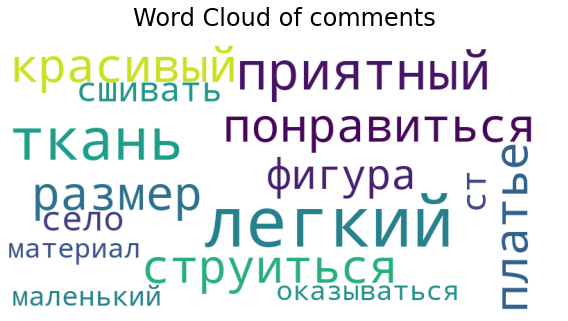

In [52]:
def plot_wordcloud(preprocessed_comments, mask=None, max_words=15, max_font_size=100, figure_size=(8.0,8.0), 
                   title = None, title_size=24, image_color=False):
    stopwords = {}
    wordcloud = WordCloud(background_color='white',
                    mask=None,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 666,
                    contour_width=1,
                    contour_color='black',
                    width=800, 
                    height=400,
                    )
    wordcloud.generate(str(preprocessed_comments))
    fig, ax = plt.subplots(figsize=figure_size)
 #   plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    plt.savefig('/home/sv/Dev/Dev_bootcamp/plot.jpg')
plot_wordcloud(preprocessed_comments, title="Word Cloud of comments")


# tf-idf

In [60]:
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1, 2))
vectorizer 

TfidfVectorizer(min_df=5, ngram_range=(1, 2))

In [61]:
vectorized_comments = vectorizer.fit_transform(preprocessed_comments)

In [62]:
#  creating a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [66]:
#–≠—Ç–∏ —Å–ª–æ–≤–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é, –æ–Ω –≤–≤–æ–¥–∏—Ç —Ç–æ, –ø–æ —á–µ–º—É —Ö–æ—á–µ—Ç –ø–æ—á–∏—Ç–∞—Ç—å –ø–æ–¥—Ä–æ–±–Ω–µ–µ, –∏–ª–∏ —Å–≤–æ–µ —Å–ª–æ–≤–æ
res=pd.DataFrame(tfidf.sort_values(by=['tfidf'], ascending=True).head(5))

In [81]:
', '.join(res.index)

'–ª–µ–≥–∫–∏–π, —Ç–∫–∞–Ω—å, –ø—Ä–∏—è—Ç–Ω—ã–π, —Ä–∞–∑–º–µ—Ä, —Ñ–∏–≥—É—Ä–∞'

# Looking for most similar comments for each word

In [30]:
nlp = spacy.load('ru_core_news_lg')

In [31]:
def top_10_similar(word_for_checking, dataframe):
    critical_similarity_value = 0.47
    
    word_for_checking = nlp(word_for_checking)
    similarities = []
    for i in range(len(dataframe['lemma_comment'])):
        similarities.append(nlp(dataframe['lemma_comment'][i]).similarity(word_for_checking))
    
    df_temp = dataframe.copy()
    
    df_temp[f'similarity_to_{word_for_checking}'] = similarities
    #—Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ —É–±—ã–≤–∞–Ω–∏—é similarities, —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å critical_similarity_value
    df_temp = df_temp.sort_values(by = f'similarity_to_{word_for_checking}', ascending = False).head(10)
    res = df_temp[df_temp[f'similarity_to_{word_for_checking}'] > critical_similarity_value][['comment', f'similarity_to_{word_for_checking}']]
    res = list(res['comment'])
    
    if len(res)>0:
        return res
    else: 
        return "–ü–æ –≤–∞—à–µ–º—É –∑–∞–ø—Ä–æ—Å—É —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –Ω–µ –Ω–∞–π–¥–µ–Ω–æ"

In [40]:
top_10_similar('—Å–∫–æ—Ä–æ—Å—Ç—å', df)

<ipython-input-31-140f86de7d42>:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities.append(nlp(dataframe['lemma_comment'][i]).similarity(word_for_checking))


['–†–∞–±–æ—Ç–∞–µ—Ç, –Ω–∞ max —Å–∫–æ—Ä–æ—Å—Ç–∏ –Ω–µ –≥—Ä–æ–º—á–µ, —á–µ–º —Ö–æ—Ä–æ—à–∏–π –º–∏–∫—Å–µ—Ä.',
 '–°—É—É–ø–µ—Ä. –ü–æ —Ç–∞–∫–æ–π —Ü–µ–Ω–µ –º–æ—â–Ω–æ—Å—Ç–∏ —Ö–≤–∞—Ç–∞–µ—Ç. –ë–æ–ª—å—à–∞—è —É–¥–æ–±–Ω–∞—è —à—É–º–∏—Ç —Å–∏–ª—å–Ω–æ —Ç–æ–ª—å–∫–æ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å–∫–æ—Ä–æ—Å—Ç–∏. –Ø –æ—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω–∞ –º–∏–∫—Å–µ—Ä–æ–º, –∏ –º–∞–≥–∞–∑–∏–Ω–æ–º.',
 '–ú–∏–∫—Å–µ—Ä –ø—Ä–æ—Å—Ç–æ –±–æ–º–±–∞! –ü—Ä–∏—à—ë–ª –≤ –¥–≤–æ–π–Ω–æ–π —É–ø–∞–∫–æ–≤–∫–µ, –≤—Å—ë –≤ –Ω–∞–ª–∏—á–∏–∏: –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏—è, –≤–µ–Ω—á–∏–∫–∏, –ª–æ–ø–∞—Ç–∫–∞. –¶–≤–µ—Ç —Ñ–∏–æ–ª–µ—Ç–æ–≤—ã–π —Ö–∞–º–µ–ª–µ–æ–Ω. –î–ª—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–∏–∫–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–∏—Ö–æ —Ä–∞–±–æ—Ç–∞–µ—Ç, —Å–∫–æ—Ä–æ—Å—Ç–∏ –ø–µ—Ä–µ–∫–ª—é—á–∞—é—Ç—Å—è –ø–ª–∞–≤–Ω–æ, –Ω–∞ 6 —Å–∫–æ—Ä–æ—Å—Ç–∏ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –≤–∏–±—Ä–∞—Ü–∏—è, –Ω–æ —ç—Ç–æ 4000 –æ–±–æ—Ä–æ—Ç–æ–≤ –≤ –º–∏–Ω—É—Ç—É. –í–∑–±–∏–≤–∞–µ—Ç –∏ —Å–º–µ—à–∏–≤–∞–µ—Ç –Ω–∞ —É—Ä–∞.',
 '–ú–Ω—ë –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è...–ù–æ –ø—Ä–æ—à–ª–æ –¥–≤–∞ –º–µ—Å—è—Ü–∞ –∏ –æ–Ω —Å–ª–æ–º–∞–ª—Å—è..–ü–µ—Ä–µ

In [19]:
# –ø–æ–∫–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ —Å–ª–æ–≤–∞–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, "–º–∞–ª–æ–º–µ—Ä–∏—Ç"
# –µ—Å–ª–∏ –ø–∏—à–µ—à—å –ø–ª–æ—Ö–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ, —Ç–æ –≤—ã–¥–∞—á–∞ –≤—Ä–æ–¥–µ —Ç–∞ –∂–µ, —á—Ç–æ –∏ –Ω–∞ —Ö–æ—Ä–æ—à–µ–µ
# –≤—Å—è —Ä–∞–±–æ—Ç–∞ —É –º–µ–Ω—è –∑–∞–Ω—è–ª–∞ 30 —Å–µ–∫—É–Ω–¥